엔트로피, 상호정보량 20191116_01 ~ 03, 데이터 분석, 머신러닝용 파이썬 패키지 20191116_01 ~ 02

<img src="resources/entropy.png">


In [11]:
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [12]:
-0.8 * np.log2(0.8) - 0.2 * np.log2(0.2)

0.7219280948873623

In [1]:
# eps 실수중 가장 작은값
eps = np.finfo(float).eps
-1 * np.log2(1) - eps * np.log2(eps)

1.1546319456101628e-14

# 연습문제 10.1.1

In [20]:
xx = np.linspace(0, 1, 1000)

In [26]:
h = -xx*np.log2(xx)-(1-xx)*np.log2(1-xx)

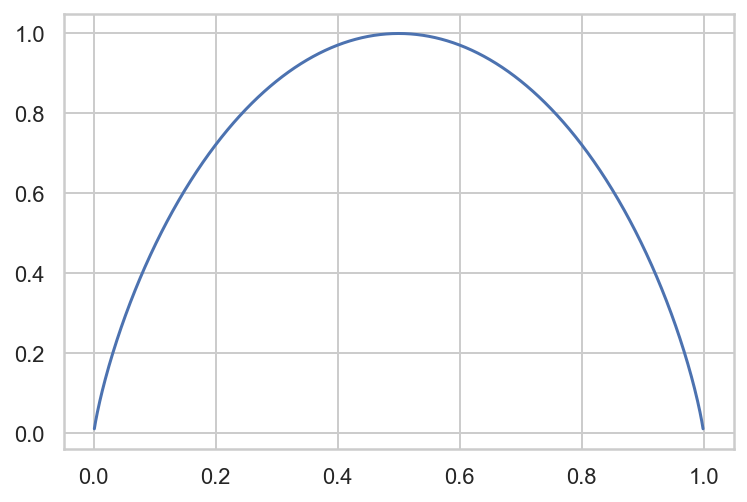

In [28]:
plt.plot(xx,h )
plt.show()
%matplotlib inline

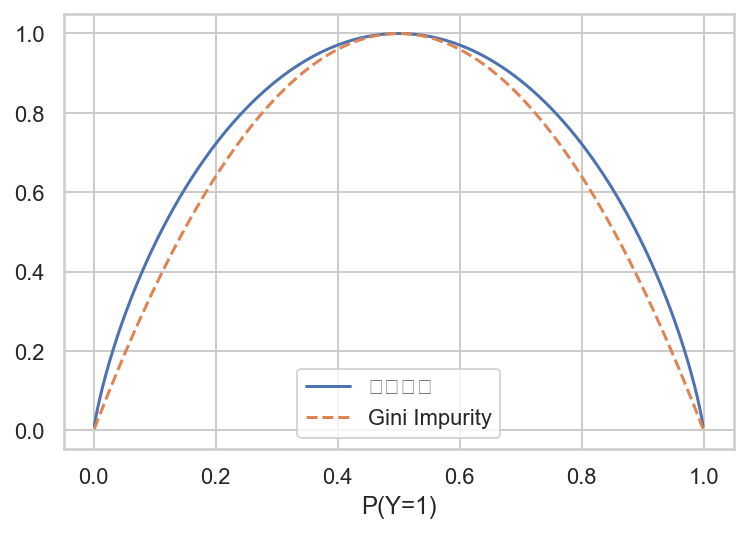

In [63]:
P0 = np.linspace(0.001, 1 - 0.001, 1000) 
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
G =  2 * (P0 * (1-P0) + P1 * (1- P1))
plt.plot(P1, H, "-", label="엔트로피") 
plt.plot(P1, G, "--", label="Gini Impurity") 
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()
%matplotlib inline

# 연습문제 10.1.2

In [30]:
# 1)
-(1/8)*np.log2(1/8) -(1/8)*np.log2(1/8) -(1/4)*np.log2(1/4) -(1/2)*np.log2(1/2)

1.75

In [35]:
# 2)
eps = np.finfo(float).eps
eps

2.220446049250313e-16

In [36]:
-(1)*np.log2(1) -(eps)*np.log2(eps) -(eps)*np.log2(eps) -(eps)*np.log2(eps)

3.4638958368304884e-14

In [38]:
# 3)
-(1/4)*np.log2(1/4) -(1/4)*np.log2(1/4) -(1/4)*np.log2(1/4) -(1/4)*np.log2(1/4)

2.0

# 엔트로피의 추정

In [39]:
p = [0.5, 0.5]
sp.stats.entropy(p, base=2)

1.0

In [43]:
p = [(1/3), (2/3)]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [44]:
p = [(1/4), (3/4)]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [42]:
p = [0, 1]
sp.stats.entropy(p, base=2)

0.0

# 가변길이 인코딩

In [51]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))

In [53]:
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'DABAABDABABAAABCBACACDBDBDBCDABAAADDABAAAABBADBACBBAAAAADAABAAABABACABAAAACACADABBAABCBCABCABAACAAAAADAACCCBABAACAAAADDABCAAACABDABABAADBDBDABAABBBAAAADABAABCBBBBCDADABDABAACAACABADCAAABBACABAADCADAAA'

In [55]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
encoded_doc

'1100010000011100010001000000011001001000101101110111011011000100000011110001000000000101001101001001010000000000110000010000000100010010000100000000100010001100010100000110011000011000010000100000000000110000101010010001000010000000001111000110000000100001110001000100001101110111000100000101010000000011000100000110010101011011001100011100010000100000100001001110000000010100100001000011100011000000'

In [56]:
len(encoded_doc)

400

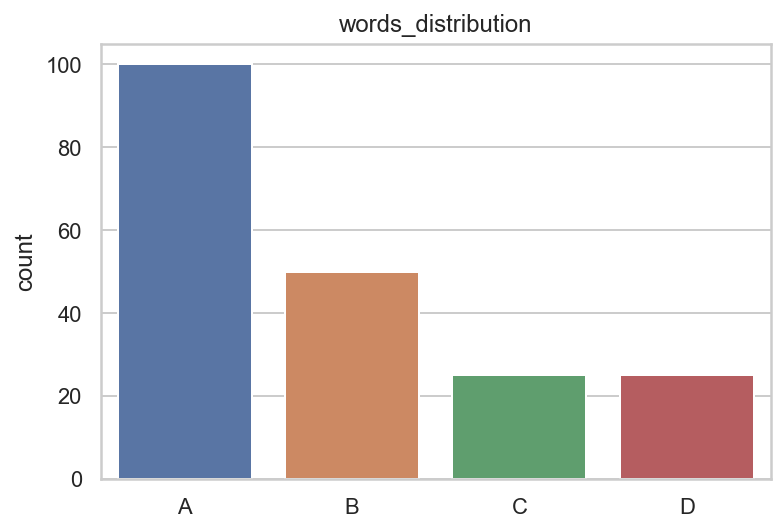

In [57]:
sns.countplot(list(doc), order="ABCD")
plt.title("words_distribution")
plt.show()

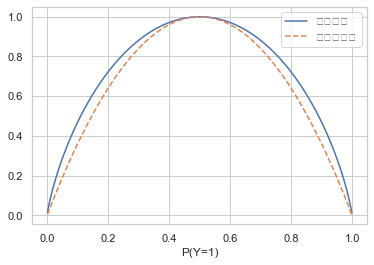

In [24]:
P0 = np.linspace(0.001, 1 - 0.001, 1000)
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
G = 2 * (P0 * (1 - P0) + P1 * (1 - P1))

plt.plot(P1, H, "-", label="엔트로피")
plt.plot(P1, G, "--", label="지니불순도")
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()

# 조건부 엔트로피 스팸메일 분류

In [73]:
# 키워드 첫번째
40/80 *(sp.stats.entropy([3/4, 1/4], base=2)) + 40/80 * (sp.stats.entropy([1/4, 3/4], base=2))

0.8112781244591328

In [79]:
# 키워드 두번째
60/80 *(sp.stats.entropy([2/6, 4/6], base=2)) + 20/80 * (sp.stats.entropy([2/2, 0/2], base=2))

0.6887218755408671

In [75]:
sp.stats.entropy([2/4, 2/4], base=2)

1.0

In [76]:
sp.stats.entropy([4/4, 0/4], base=2)

0.0

In [80]:
# 결론 : 엔트로피가 가장 낮은 3번키워드와 2번키워드 두개가 좋다

# 조건부 엔트로피를 사용한 붓꽃 분류

In [98]:
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


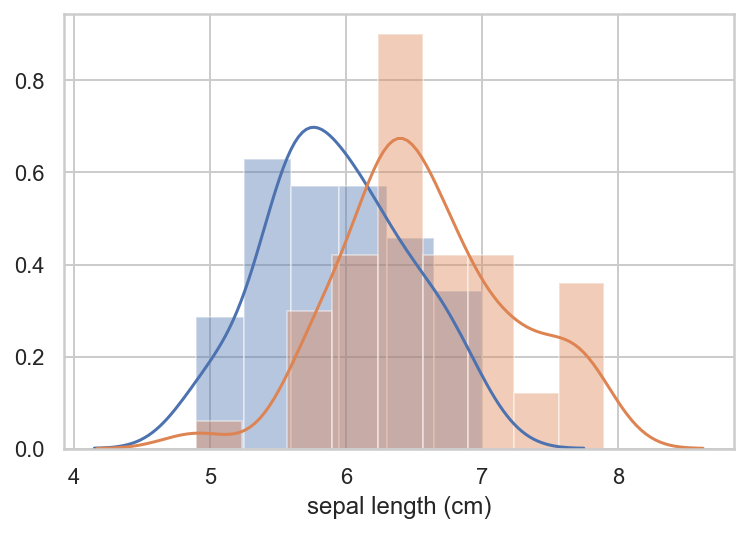

In [96]:
sns.distplot(df[df.species ==1]["sepal length (cm)"])
sns.distplot(df[df.species ==2]["sepal length (cm)"])
plt.show()

# 6cm 기준

In [89]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [93]:
# 6cm 기준 엔트로피
39/100 *(sp.stats.entropy([30/39, 9/39], base=2)) + 61/100 * (sp.stats.entropy([20/61, 41/61], base=2))

0.8607142715863871

# 6,5 cm 기준

In [101]:
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table1 = df.groupby(["X2", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X2,,
False,42,28
True,8,22


In [112]:
pivot_table1.values

array([[42, 28],
       [ 8, 22]])

In [102]:
# 6.5 cm 기준 엔트로피
70/100 *(sp.stats.entropy([42/70, 28/70], base=2)) + 30/100 * (sp.stats.entropy([8/30, 22/30], base=2))

0.9306576387006184

### 결론 엔트로기가 낮은 6cm를 선택해야한다

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


# 조건부 엔트로피 구하는 func

In [113]:
def con_entropy(v):
    a = v[0, :] / np.sum(v[0, :])
    b = v[1, :] / np.sum(v[1, :])
    ha = sp.stats.entropy(a, base = 2)
    hb = sp.stats.entropy(b, base = 2)
    H = np.sum(v, axis=1) @ [ha, hb] / np.sum(v)
    return H

In [156]:
def table(i):
    df["X1"] = df["sepal length (cm)"] > i
    pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
    return pivot_table1


w = ([])
for i in np.arange(4.9, 7.9+0.05, step = 0.05):
    w.append(table(i))
    


    
    


In [157]:
len(w)

61

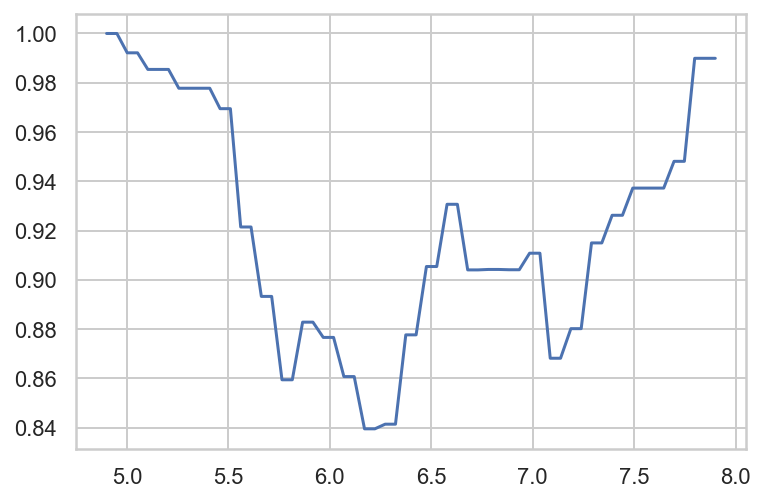

In [164]:
xx = np.linspace(4.9, 7.9 , 60)
y = [con_entropy(w[x].values) for x in range(0, 60)]

plt.plot(xx, y)

In [120]:
pivot_table1

species,1,2
X1,,
False,50.0,49.0
True,0.0,1.0


# 연습문제 10.2.1

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


### (1) 붓꽃 데이터에서 꽃받침의 길이(sepal length)의 최솟값과 최댓값 구간을 0.05 간격으로 나누어 각각의 값을 
### 기준값으로 하였을 때 조건부엔트로피가 어떻게 변하는지 그래프로 그려라.

In [107]:
df["sepal length (cm)"].min(), df["sepal length (cm)"].max()

(4.9, 7.9)

In [113]:
def con_entropy(v):
    a = v[0, :] / np.sum(v[0, :])
    b = v[1, :] / np.sum(v[1, :])
    ha = sp.stats.entropy(a, base = 2)
    hb = sp.stats.entropy(b, base = 2)
    H = np.sum(v, axis=1) @ [ha, hb] / np.sum(v)
    return H

In [167]:
def table(i):
    df["X1"] = df["sepal length (cm)"] > i
    pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
    return pivot_table1

w = ([])
for i in np.arange(4.9, 7.9+0.05, 0.05):
    w.append(table(i))

In [168]:
w

[species   1   2
 X1             
 False     1   1
 True     49  49,
 species   1   2
 X1             
 False     1   1
 True     49  49,
 species   1   2
 X1             
 False     3   1
 True     47  49,
 species   1   2
 X1             
 False     3   1
 True     47  49,
 species   1   2
 X1             
 False     4   1
 True     46  49,
 species   1   2
 X1             
 False     4   1
 True     46  49,
 species   1   2
 X1             
 False     4   1
 True     46  49,
 species   1   2
 X1             
 False     5   1
 True     45  49,
 species   1   2
 X1             
 False     5   1
 True     45  49,
 species   1   2
 X1             
 False     5   1
 True     45  49,
 species   1   2
 X1             
 False     5   1
 True     45  49,
 species   1   2
 X1             
 False     6   1
 True     44  49,
 species   1   2
 X1             
 False     6   1
 True     44  49,
 species   1   2
 X1             
 False    11   1
 True     39  49,
 species   1   2
 X1             


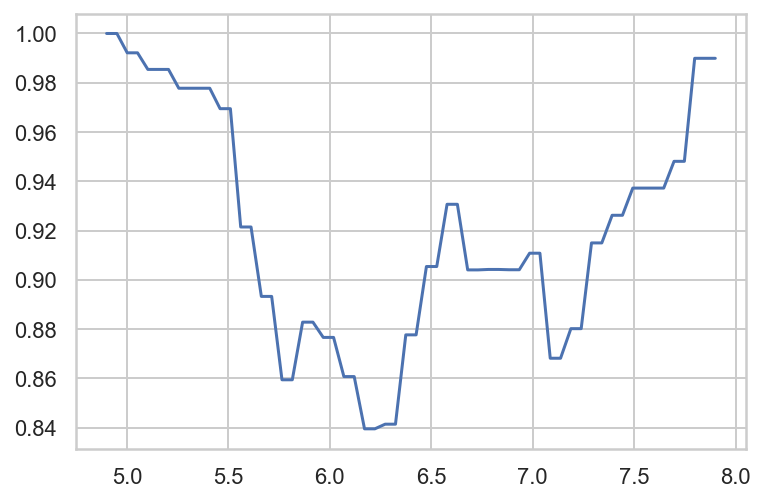

In [169]:
xx = np.linspace(4.9, 7.9 , 60)
y = [con_entropy(w[x].values) for x in range(0, 60)]

plt.plot(xx, y)

In [166]:
y

[1.0,
 1.0,
 0.9921505417657337,
 0.9921505417657337,
 0.9854129092560906,
 0.9854129092560906,
 0.9854129092560906,
 0.9777731489110747,
 0.9777731489110747,
 0.9777731489110747,
 0.9777731489110747,
 0.9694770530143693,
 0.9694770530143693,
 0.9214431574645288,
 0.9214431574645288,
 0.8932597776751744,
 0.8932597776751744,
 0.8594091277095427,
 0.8594091277095427,
 0.8828123014105905,
 0.8828123014105905,
 0.8766158010393013,
 0.8766158010393013,
 0.860714271586387,
 0.860714271586387,
 0.8395000263554215,
 0.8395000263554215,
 0.8413871497735644,
 0.8413871497735644,
 0.877650867560479,
 0.877650867560479,
 0.90539323548625,
 0.90539323548625,
 0.9306576387006182,
 0.9306576387006182,
 0.9040233826945792,
 0.9040233826945792,
 0.9042037171763908,
 0.9042037171763908,
 0.9040867654123343,
 0.9040867654123343,
 0.9108022259351823,
 0.9108022259351823,
 0.8681592744048966,
 0.8681592744048966,
 0.8801677933164548,
 0.8801677933164548,
 0.9149755871180102,
 0.9149755871180102,
 0.926195

# 정답

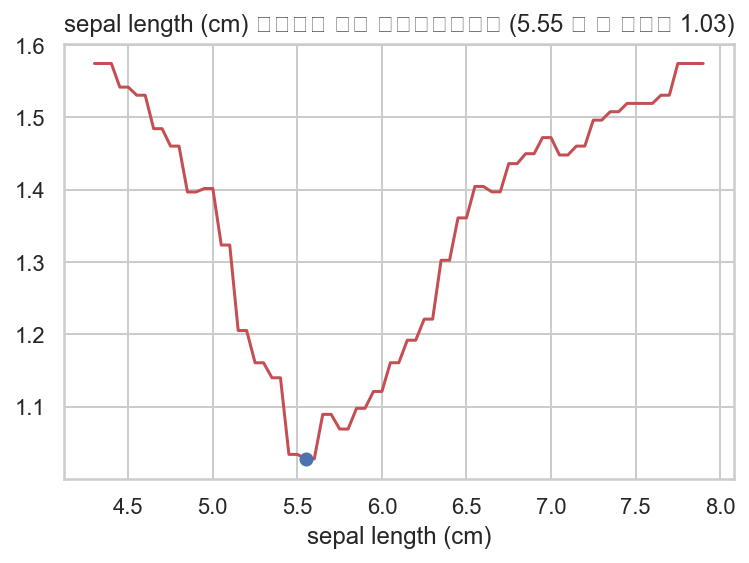

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 
df["species"] = iris.target

def calc_cond_entropies(col, threshold): 
    df["X1"] = df[col] > threshold 
    pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0) 
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v) 
    return HYX

def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    cond_entropies = [] 
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))
        
    id_min = np.argmin(cond_entropies) 
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies) 
    plt.plot(th_range, cond_entropies, "r-") 
    plt.plot(th_min, ce_min, "bo")
    title = "{} 기준값에 따른 조건부엔트로피 ({:.3} 일 때 최소값 {:.3})".format(col, th_min, ce_min)
    plt.title(title) 
    plt.xlabel(col) 
    plt.show()
plot_min_cond_centropy("sepal length (cm)")
%matplotlib inline

### (2) 꽃받침의 길이를 특징으로 사용하였을 때 어떤 값을 기준값으로 하는 것이 가장 좋은가?

### (3) 꽃받침의 폭(sepal width)에 대해 위의 분석을 실시하라. 이 때는 기준값이 어떻게 되는가?

### (4) 꽃받침의 길이(sepal length)와 꽃받침의 폭(sepal width) 중 하나를 특징으로 선택해야 한다면 어떤 것을 선택해야 하는가?